In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [7]:
def venn_diagram_plotter_scatter(fn, nrow = None, rows= None, 
                                 x = "Normalised Enrichment Score", y = "Pathways" , size = "SIZE" , 
                                 hue = "NOM p-val", alpha = 0.7, sizes = (40, 100) , title = "GSEA Results", saveas = "GSEA.jpeg", xlabel = "Normalised nrichment strength"):
    if fn[-3:] == "csv":
        df = pd.read_csv(fn)
    elif fn[-3:] == "tsv":
        df = pd.read_csv(fn, sep = "\t")
        
    if rows != None:
        df = df[df[y].isin(rows)]
    
    if nrow != None:
        df = df.iloc[:nrow]
    df = df.sort_values(by=[x], ascending = False)

    # use the scatterplot function
    sns.set_style(style='white')
    ax = sns.scatterplot(data=df, x=x, y=y, size=size, hue=hue, alpha= alpha, sizes=sizes)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=8)

    # show the graph
    # plt.xlim(1.2,2.2)
    ax.set_xlabel(xlabel)
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.37, right=0.8)
    plt.title(title, fontsize= 15)
    plt.tick_params(axis='y', labelsize=5)
    plt.savefig(saveas,dpi=200)
    plt.show()

def venn_diagram_plotter_bar(fn, nrow = None, title = "GSEA Results", saveas = "GSEA.jpeg"):
    if fn[-3:] == "csv":
        df = pd.read_csv(fn)
    elif fn[-3:] == "tsv":
        df = pd.read_csv(fn, sep = "\t")
        
    if nrow != None:
        df = df.iloc[:nrow]
        
    sns.set(rc = {'figure.figsize':(10,6)})
    sns.set_style(style='white')

    norm = plt.Normalize(df["false discovery rate"].min(), df["false discovery rate"].max())
    sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
    sm.set_array([])

    ax = sns.barplot(data=df, x= "strength", y="term description", hue = "false discovery rate", dodge = False, palette='magma', alpha = 0.7)
    ax.get_legend().remove()
    cbar = ax.figure.colorbar(sm)
    cbar.set_label('FDR', rotation=270, labelpad=15)

    # show the graph
    plt.title(title, fontsize= 15)
    ax.set(ylabel=None)
    ax.set_xlabel("Enrichment strength")
    # plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.4)
    plt.savefig(saveas,dpi=200)
    plt.show()

def volcano_plot(fn, display = False):
    if fn[-3:] == "csv":
        df = pd.read_csv(fn)
    elif fn[-3:] == "tsv":
        df = pd.read_csv(fn, sep = "\t")
        
    df.index = df['NAME']
    df["-log10(p-value)"] = -np.log10(df["NOM p-val"])

    # do not display the pathways with p-value > 0.05 if display is False
    if display == False:
        i = ["_" + idx if df.loc[idx, "NOM p-val"] > 0.05 else idx for idx in df['NAME']]
        df['NAME'] = i

    # plot the volcano plot
    g = sns.scatterplot(data=df, x="NES", y="-log10(p-value)", hue="NAME", alpha=0.7, s=100)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    plt.axhline(y = -math.log10(0.05), color = 'r', linestyle = '-')

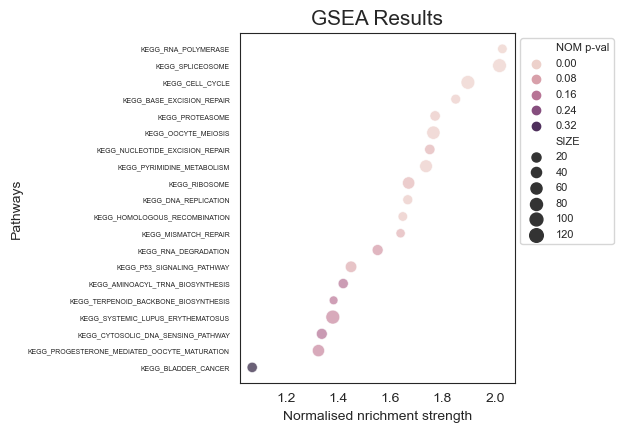

In [4]:
rows = ['KEGG_RNA_POLYMERASE',
'KEGG_SPLICEOSOME',
'KEGG_CELL_CYCLE',
'KEGG_BASE_EXCISION_REPAIR',
'KEGG_PROTEASOME',
'KEGG_OOCYTE_MEIOSIS',
'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
'KEGG_PYRIMIDINE_METABOLISM',
'KEGG_RIBOSOME',
'KEGG_DNA_REPLICATION',
'KEGG_HOMOLOGOUS_RECOMBINATION',
'KEGG_MISMATCH_REPAIR',
'KEGG_RNA_DEGRADATION',
'KEGG_P53_SIGNALING_PATHWAY',
'KEGG_AMINOACYL_TRNA_BIOSYNTHESIS',
'KEGG_TERPENOID_BACKBONE_BIOSYNTHESIS',
'KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS',
'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY',
'KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION',
'KEGG_BLADDER_CANCER']

kwargs = {
    "nrow": 20,
    "rows": rows,
    "title": "GSEA Results",
    "saveas": "GSEA.jpeg",
    "x": "Normalised Enrichment Score",
    "y": "Pathways",
    "size": "SIZE",
    "hue": "NOM p-val",
    "alpha": 0.7,
    "sizes": (40, 100)
}

fn = "./data/gsea_report_for_low_1684386912385.csv"
venn_diagram_plotter_scatter(fn, **kwargs)

/var/folders/mp/lfr86vf57gzgqs4tr6qd5bs80000gn/T/ipykernel_11961/1756724259.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


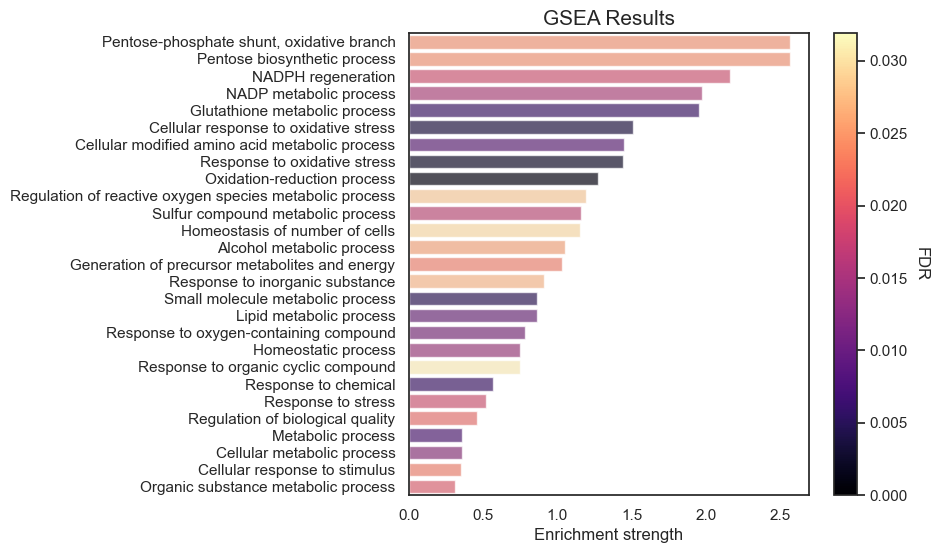

In [8]:
venn_diagram_plotter_bar("./String/string_expanded_list_AOS.csv")

/var/folders/mp/lfr86vf57gzgqs4tr6qd5bs80000gn/T/ipykernel_11961/1756724259.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


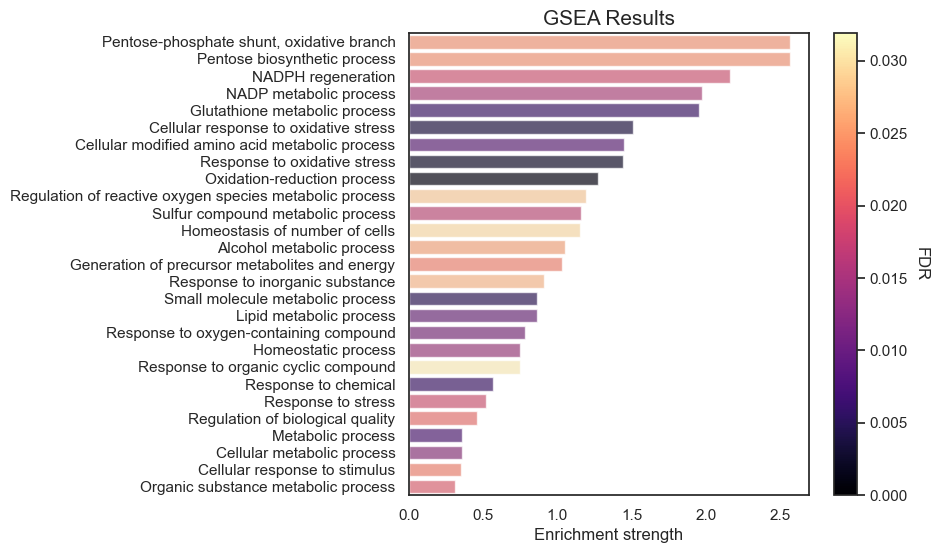

In [9]:
venn_diagram_plotter_bar(fn = "./String/string_expanded_list_AOS.csv", saveas = 'GSEA_fromheatmap_nrf2.jpeg')

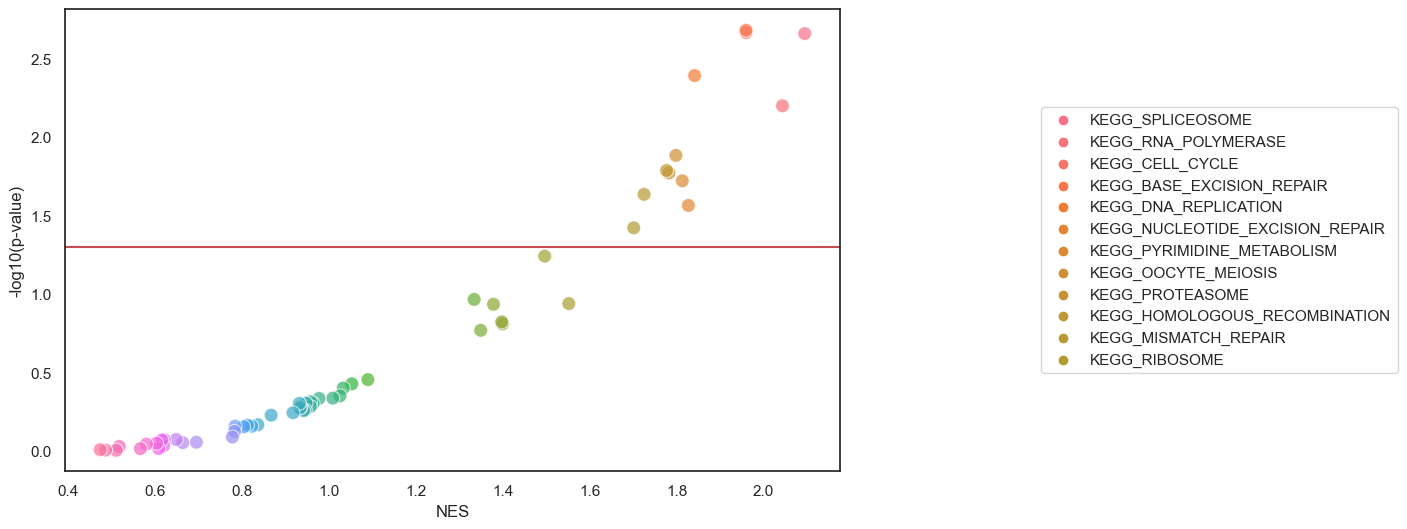

In [14]:
volcano_plot('./GSEA/gsea_report_for_low_1686039728978.tsv')

/Users/shanghongsim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


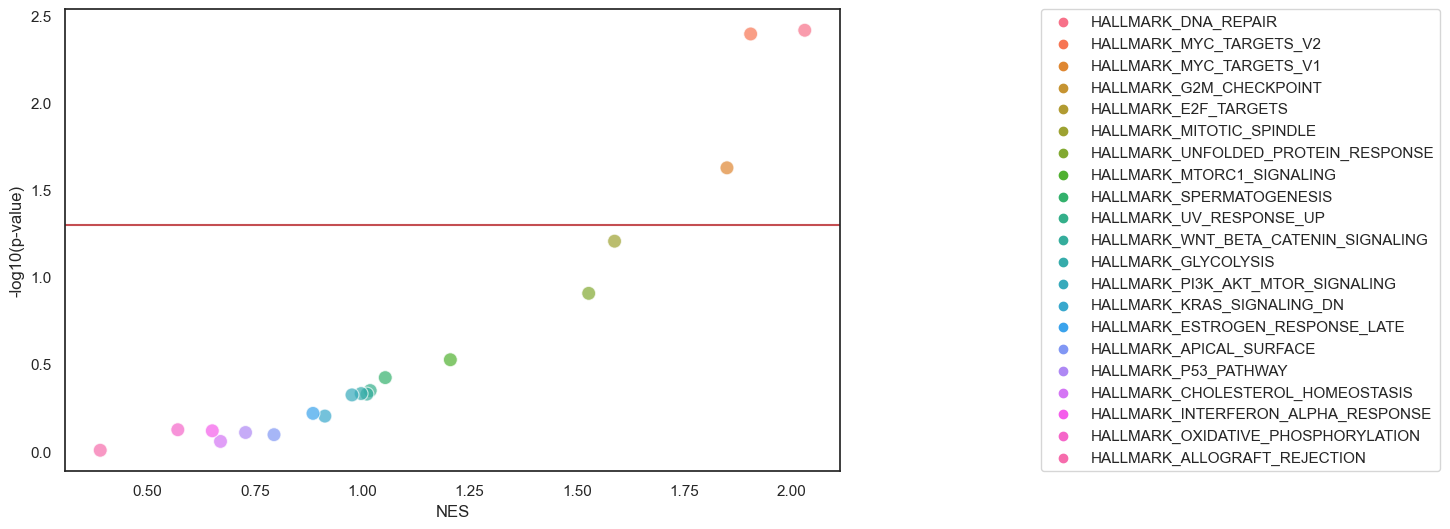

In [18]:
volcano_plot('./GSEA/gsea_report_for_low_hall.tsv', display = True)

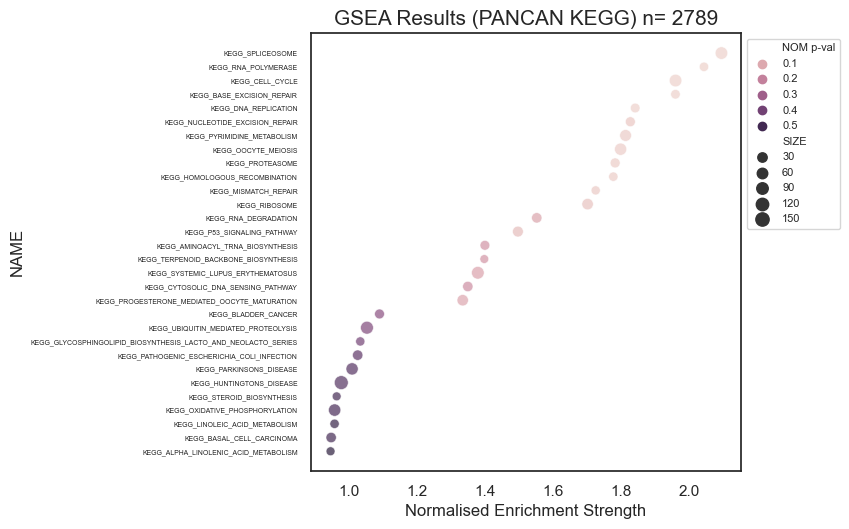

In [72]:
fn = './GSEA/recent/PANCAN_kegg.tsv'
kwargs = {
    "nrow": 30,
    "rows": None,
    "title": "GSEA Results (PANCAN KEGG) n= 2789",
    "saveas": "GSEA.jpeg",
    "x": "NES",
    "y": "NAME",
    "size": "SIZE",
    "hue": "NOM p-val",
    "alpha": 0.7,
    "sizes": (40, 100),
    "xlabel": "Normalised Enrichment Strength"
}
venn_diagram_plotter_scatter(fn, **kwargs)


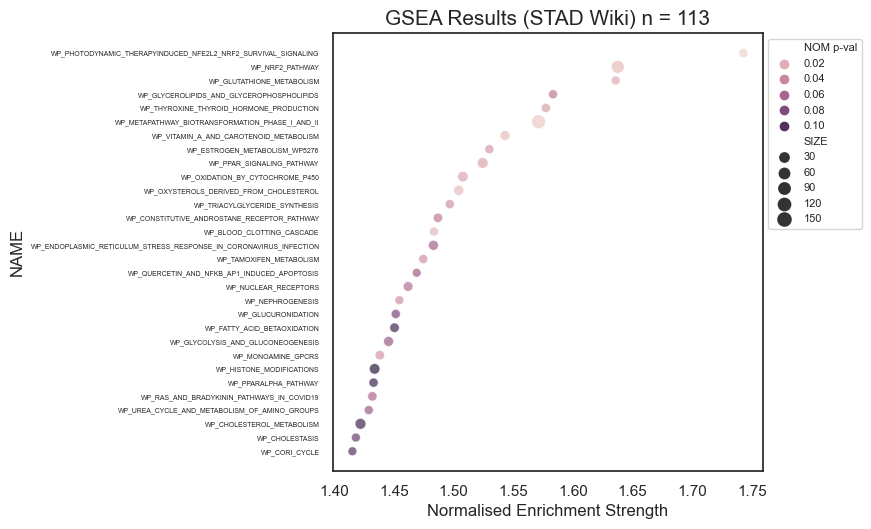

In [73]:


fn = './GSEA/recent/STAD_wiki.tsv'
kwargs = {
    "nrow": 30,
    "rows": None,
    "title": "GSEA Results (STAD Wiki) n = 113",
    "saveas": "GSEA.jpeg",
    "x": "NES",
    "y": "NAME",
    "size": "SIZE",
    "hue": "NOM p-val",
    "alpha": 0.7,
    "sizes": (40, 100),
    "xlabel": "Normalised Enrichment Strength"
}
venn_diagram_plotter_scatter(fn, **kwargs)


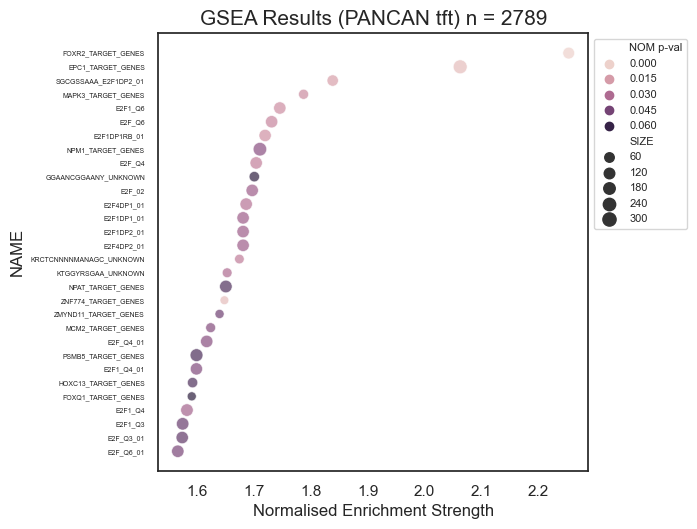

In [74]:
fn = './GSEA/recent/PANCAN_tft.tsv'
kwargs = {
    "nrow": 30,
    "rows": None,
    "title": "GSEA Results (PANCAN tft) n = 2789",
    "saveas": "GSEA.jpeg",
    "x": "NES",
    "y": "NAME",
    "size": "SIZE",
    "hue": "NOM p-val",
    "alpha": 0.7,
    "sizes": (40, 100),
    "xlabel": "Normalised Enrichment Strength"
}
venn_diagram_plotter_scatter(fn, **kwargs)


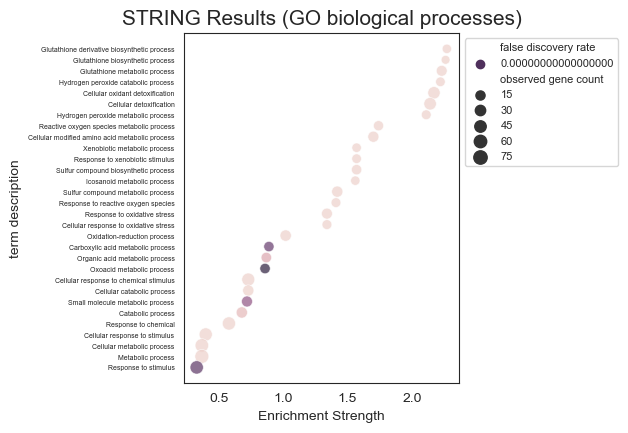

In [8]:


fn = "./enrichment.Process.tsv"
kwargs = {
    "nrow": 30,
    "rows": None,
    "title": "STRING Results (GO biological processes)",
    "saveas": "GSEA.jpeg",
    "x": "strength",
    "y": "term description",
    "size": "observed gene count",
    "hue": "false discovery rate",
    "alpha": 0.7,
    "sizes": (40, 100),
    "xlabel": "Enrichment Strength"
}
venn_diagram_plotter_scatter(fn, **kwargs)

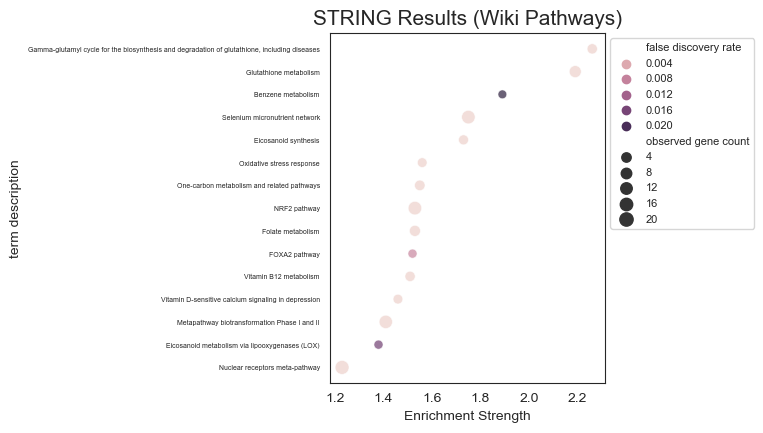

In [9]:
fn = "./enrichment.WikiPathways.tsv"
kwargs = {
    "nrow": 30,
    "rows": None,
    "title": "STRING Results (Wiki Pathways)",
    "saveas": "GSEA.jpeg",
    "x": "strength",
    "y": "term description",
    "size": "observed gene count",
    "hue": "false discovery rate",
    "alpha": 0.7,
    "sizes": (40, 100),
    "xlabel": "Enrichment Strength"
}
venn_diagram_plotter_scatter(fn, **kwargs)

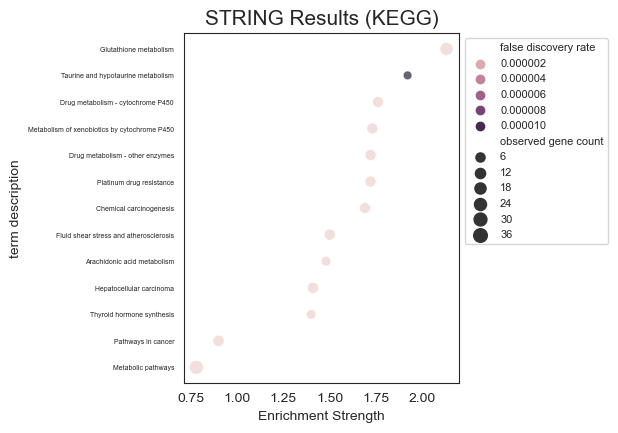

In [10]:
fn = "./enrichment.KEGG.tsv"
kwargs = {
    "nrow": 30,
    "rows": None,
    "title": "STRING Results (KEGG)",
    "saveas": "GSEA.jpeg",
    "x": "strength",
    "y": "term description",
    "size": "observed gene count",
    "hue": "false discovery rate",
    "alpha": 0.7,
    "sizes": (40, 100),
    "xlabel": "Enrichment Strength"
}
venn_diagram_plotter_scatter(fn, **kwargs)


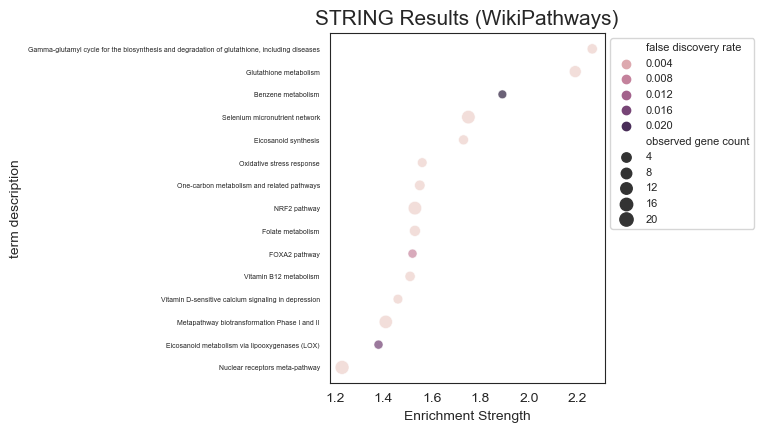

In [11]:
fn = "./enrichment.WikiPathways.tsv"
kwargs = {
    "nrow": 30,
    "rows": None,
    "title": "STRING Results (WikiPathways)",
    "saveas": "GSEA.jpeg",
    "x": "strength",
    "y": "term description",
    "size": "observed gene count",
    "hue": "false discovery rate",
    "alpha": 0.7,
    "sizes": (40, 100),
    "xlabel": "Enrichment Strength"
}
venn_diagram_plotter_scatter(fn, **kwargs)


